The Sparks Foundation - GRIP - Data Science and Business Analytics - JUNE 2023

TASK 4 : Exploratory Data Analysis - Terrorism

Author :ZAIN ABDUR RAZZAK

Dataset used: Global Terrorism

## Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import warnings as wg
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
wg.filterwarnings("ignore")

### Import csv file and create a dataframe

In [3]:
df=pd.read_csv(r"/content/globalterrorismdb_0718dist.csv",encoding = 'ISO-8859-1', low_memory=False)

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Exploring data

In [4]:
df.shape

(83305, 135)

In [6]:
df.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    83059
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       73986
Length: 135, dtype: int64

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Summary of Dataframe

In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,8.330500e+04,83305.000000,83305.000000,83305.000000,83305.000000,83305.000000,83305.000000,79366.000000,7.936500e+04,83304.000000,...,8.720000e+02,1.360000e+02,3.310000e+02,131.000000,3006.000000,2484.000000,83304.000000,83304.000000,83304.000000,83304.000000
mean,1.989953e+11,1989.887774,6.389821,15.288722,0.026937,143.207779,6.057656,19.882372,-1.088695e+03,1.437710,...,3.197739e+06,5.364898e+05,6.547185e+05,942.603053,4.055888,-14.847424,-3.929691,-3.885612,0.123199,-3.139417
std,8.649329e+08,8.650362,3.390869,8.838071,0.161901,132.888182,3.178687,23.200974,3.059297e+05,1.090344,...,3.529603e+07,2.370669e+06,3.282384e+06,5936.316945,2.023540,61.133913,4.524297,4.581564,0.768035,4.564757
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.984013e+11,1984.000000,3.000000,8.000000,0.000000,61.000000,3.000000,6.497656,-7.421863e+01,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.990031e+11,1990.000000,6.000000,15.000000,0.000000,110.000000,6.000000,24.891115,4.291111e+00,1.000000,...,4.750000e+03,0.000000e+00,0.000000e+00,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.996053e+11,1996.000000,9.000000,23.000000,0.000000,183.000000,9.000000,37.885793,4.400715e+01,1.000000,...,5.000000e+05,0.000000e+00,5.857100e+04,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,2.007061e+11,2007.000000,12.000000,31.000000,1.000000,1003.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,2.000000e+07,4.100000e+07,48000.000000,7.000000,856.000000,1.000000,1.000000,1.000000,1.000000


### Cleaning of data

In [9]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","provstate":"State","city":"City","latitude":"Latitude","longitude":"Longitude","region_txt":"Region","attacktype1_txt":"Attacktype",
                  "targtype1_txt":"Target_type","target1":"Target","weaptype1_txt":"Weapontype","nkill":"Killed","nwound":"Wounded","gname":"Group"},inplace=True)

In [10]:
df=df[["Year","Month","Day","Country","State","City","Latitude","Longitude","Region","Attacktype","Wounded","Group","Target_type","Target","Weapontype","Killed"]]

In [11]:
df

,Year,Month,Day,Country,State,City,Latitude,Longitude,Region,Attacktype,Wounded,Group,Target_type,Target,Weapontype,Killed
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,18.456792,-69.951164,Central America & Caribbean,Assassination,0.0,MANO-D,Private Citizens & Property,Julio Guzman,Unknown,1.0
1,1970,0,0,Mexico,Federal,Mexico city,19.371887,-99.086624,North America,Hostage Taking (Kidnapping),0.0,23rd of September Communist League,Government (Diplomatic),"Nadine Chaval, daughter",Unknown,0.0
2,1970,1,0,Philippines,Tarlac,Unknown,15.478598,120.599741,Southeast Asia,Assassination,0.0,Unknown,Journalists & Media,Employee,Unknown,1.0
3,1970,1,0,Greece,Attica,Athens,37.997490,23.762728,Western Europe,Bombing/Explosion,NaN,Unknown,Government (Diplomatic),U.S. Embassy,Explosives,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,33.580412,130.396361,East Asia,Facility/Infrastructure Attack,NaN,Unknown,Government (Diplomatic),U.S. Consulate,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83300,2007,6,5,Thailand,Pattani (Provience),Yaring ((District)),6.828063,101.388500,Southeast Asia,Facility/Infrastructure Attack,0.0,Unknown,Telecommunication,Cellular communications tower,Incendiary,0.0
83301,2007,6,5,Sri Lanka,Eastern,Kalawanchikudi,7.529372,81.794609,South Asia,Bombing/Explosion,1.0,Unknown,Police,Police Inspector,Explosives,1.0
83302,2007,6,5,Afghanistan,Ghazni,Miri,33.332741,68.455071,South Asia,Bombing/Explosion,0.0,Taliban,Business,Unknown,Explosives,0.0
83303,2007,6,5,Afghanistan,Parwan,Jabalussaraj,35.118338,69.234113,South Asia,Assassination,0.0,Hizb-I-Islami,Journalists & Media,Zakia Zaki,Firearms,1.0


## Identifying the missing value

In [12]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           418
City             66
Latitude       3939
Longitude      3940
Region            0
Attacktype        0
Wounded        9367
Group             1
Target_type       1
Target          511
Weapontype        1
Killed         6389
dtype: int64

### Filling the missing values

In [13]:
df["Killed"]=df["Killed"].fillna(0).astype(int)
df["Wounded"]=df["Wounded"].fillna(0).astype(int)
df["casualties"]=df["Killed"]+ df["Wounded"]

In [14]:
df["State"]=df["State"].fillna("unknown")
df["City"]=df["City"].fillna("unknown")

In [15]:
a=df["Latitude"].mean()
df["Latitude"].fillna(a,inplace=True)

In [16]:
b=df["Longitude"].mean()
df["Longitude"].fillna(b,inplace=True)

In [17]:
df.isnull().sum()

Year             0
Month            0
Day              0
Country          0
State            0
City             0
Latitude         0
Longitude        0
Region           0
Attacktype       0
Wounded          0
Group            1
Target_type      1
Target         511
Weapontype       1
Killed           0
casualties       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83305 entries, 0 to 83304
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         83305 non-null  int64  
 1   Month        83305 non-null  int64  
 2   Day          83305 non-null  int64  
 3   Country      83305 non-null  object 
 4   State        83305 non-null  object 
 5   City         83305 non-null  object 
 6   Latitude     83305 non-null  float64
 7   Longitude    83305 non-null  float64
 8   Region       83305 non-null  object 
 9   Attacktype   83305 non-null  object 
 10  Wounded      83305 non-null  int64  
 11  Group        83304 non-null  object 
 12  Target_type  83304 non-null  object 
 13  Target       82794 non-null  object 
 14  Weapontype   83304 non-null  object 
 15  Killed       83305 non-null  int64  
 16  casualties   83305 non-null  int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 10.8+ MB


In [19]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Wounded,Killed,casualties
count,83305.000000,83305.000000,83305.000000,83305.000000,8.330500e+04,83305.000000,83305.000000,83305.000000
mean,1989.887774,6.389821,15.288722,19.882372,-1.088695e+03,2.755369,2.256227,5.011596
std,8.650362,3.390869,8.838071,22.645807,2.986074e+05,48.651149,11.983194,56.201421
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1984.000000,3.000000,8.000000,6.941837,-7.556477e+01,0.000000,0.000000,0.000000
50%,1990.000000,6.000000,15.000000,19.882372,2.342330e+00,0.000000,0.000000,1.000000
75%,1996.000000,9.000000,23.000000,36.974025,4.173566e+01,0.000000,1.000000,3.000000
max,2007.000000,12.000000,31.000000,74.633553,1.793667e+02,8191.000000,1384.000000,9574.000000


## Data visualization

In [20]:
df['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    2915
1986    2860
1987    3183
1988    3721
1989    4324
1990    3887
1991    4683
1992    5071
1994    3456
1995    3081
1996    3058
1997    3197
1998     934
1999    1395
2000    1814
2001    1906
2002    1333
2003    1278
2004    1166
2005    2017
2006    2758
2007    1197
Name: Year, dtype: int64

## Number of Terrorist Activities each Year

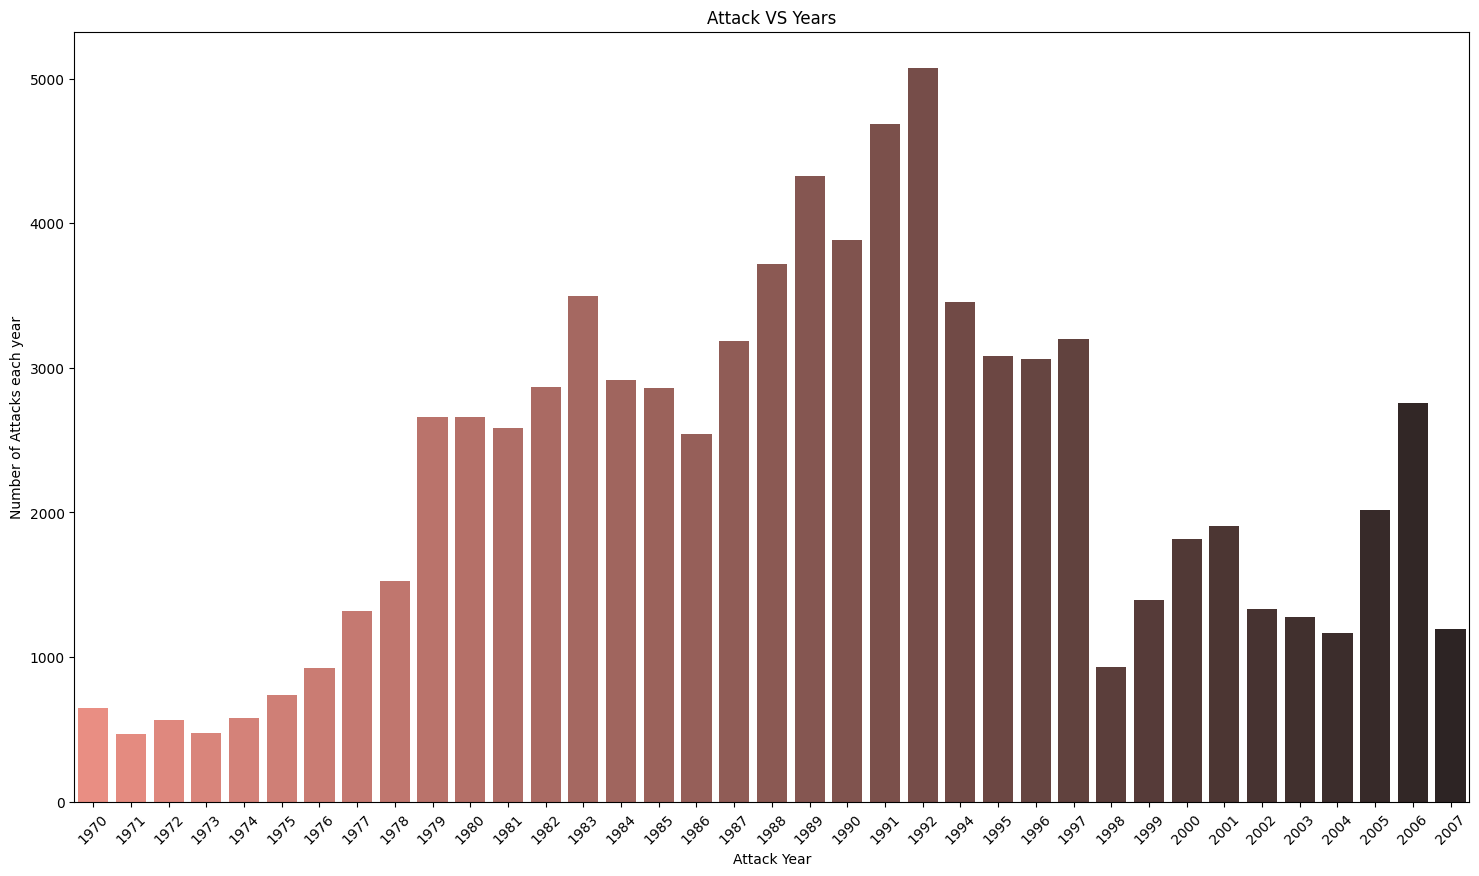

In [21]:
x_number = df['Year'].unique()
y_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_number,
           y = y_years,
           palette = 'dark:salmon_r')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack VS Years')
plt.show()

* From the above graphs shows

* 2014 appears to be witness of a huge terrorist attacks
* 2014 onwards recorded a large increase in attacks of terrorism.

### Number of Deaths in different years

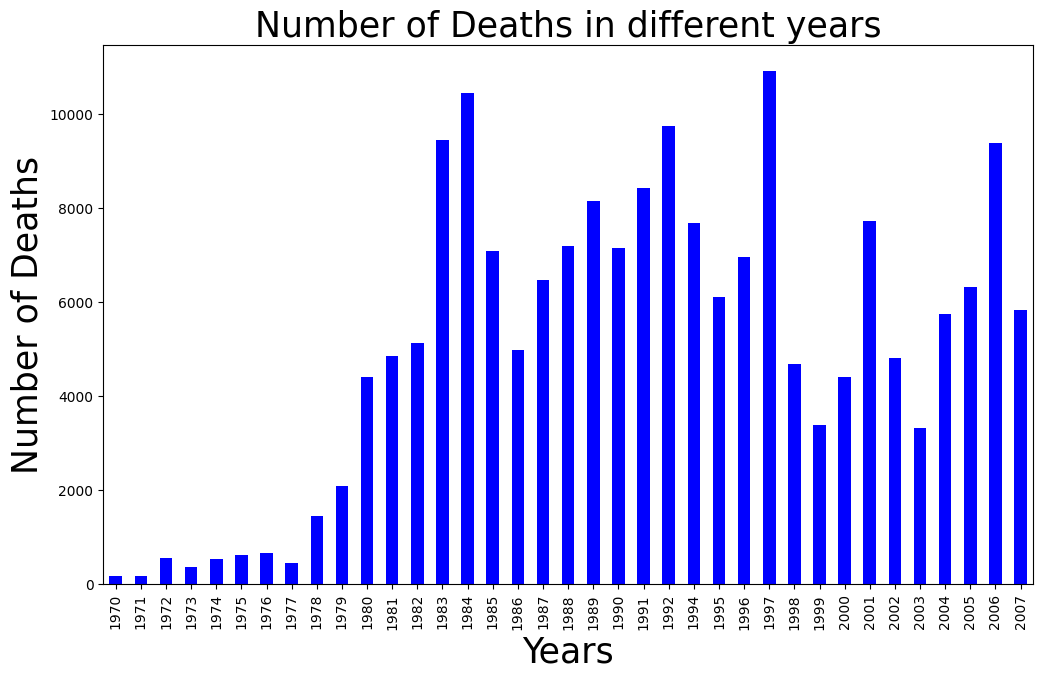

In [22]:
plt.figure(figsize = (12,7))
df.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='winter')
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()


* Number of deaths caused by terrorism is more between 2014 and 2018, with on an average >50K people being killed. High peak went to 2014 with 45K+ deaths.

## Terrorist Activities by Region in each Year

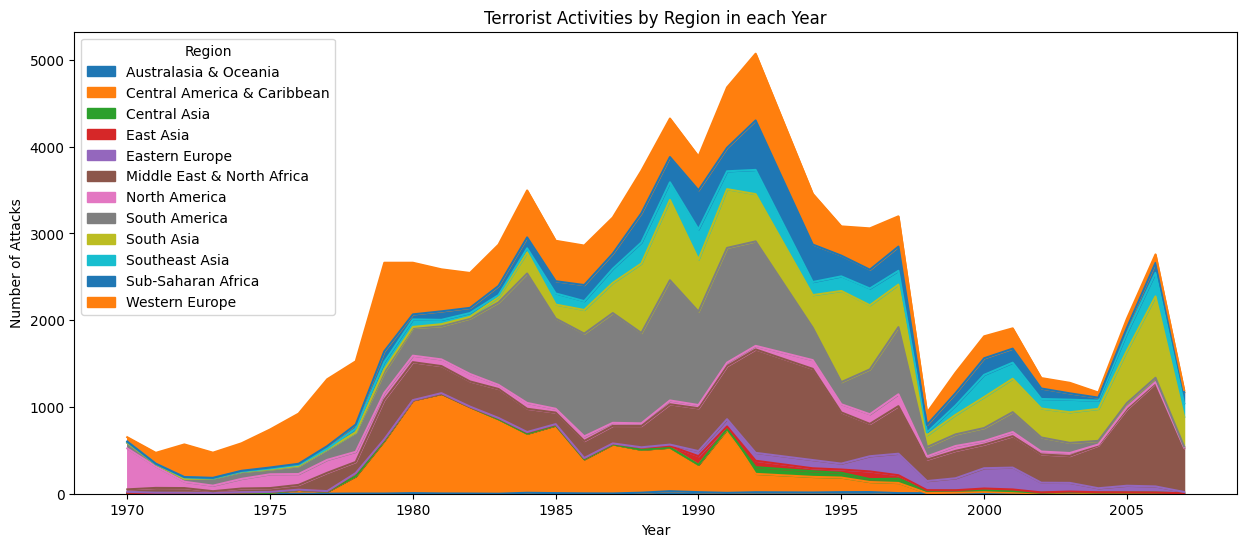

In [23]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

## Top 5 most used weapons types in terror attacks


Text(0, 0.5, 'Number of Weapon Used')

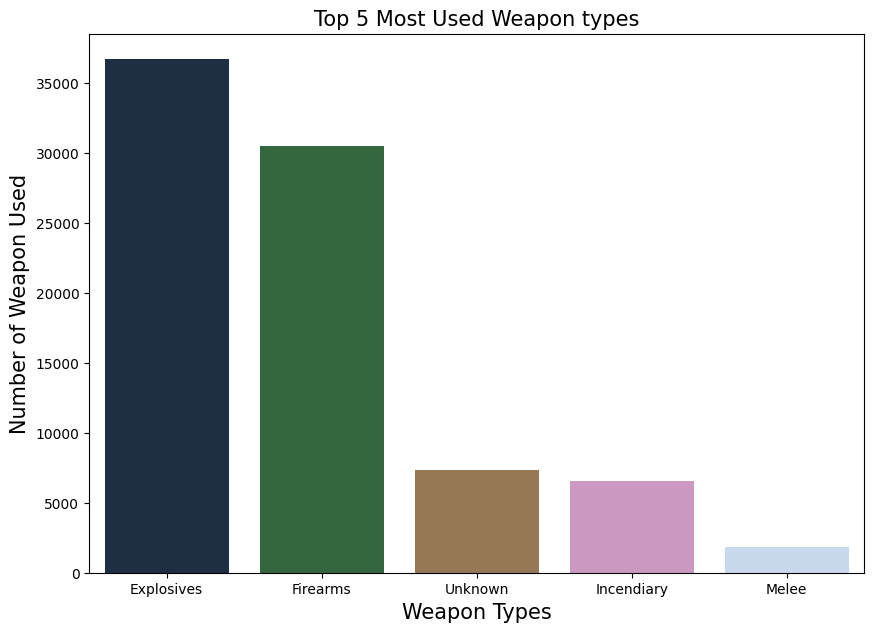

In [24]:
# Top 5 most used weapons types in terror attacks
plt.figure(figsize=(10,7))
sns.barplot(x=df['Weapontype'].value_counts().head().index,y=df['Weapontype'].value_counts().head().values,palette='cubehelix')
plt.title('Top 5 Most Used Weapon types',fontsize=15)
plt.xlabel('Weapon Types',fontsize=15)
plt.ylabel('Number of Weapon Used',fontsize=15)

## 10 most attacked targets

In [25]:
df['Attacktype'].value_counts()

Bombing/Explosion                      36372
Armed Assault                          19851
Assassination                          13269
Facility/Infrastructure Attack          5301
Hostage Taking (Kidnapping)             4016
Unknown                                 2925
Hostage Taking (Barricade Incident)      651
Unarmed Assault                          531
Hijacking                                388
Bom                                        1
Name: Attacktype, dtype: int64

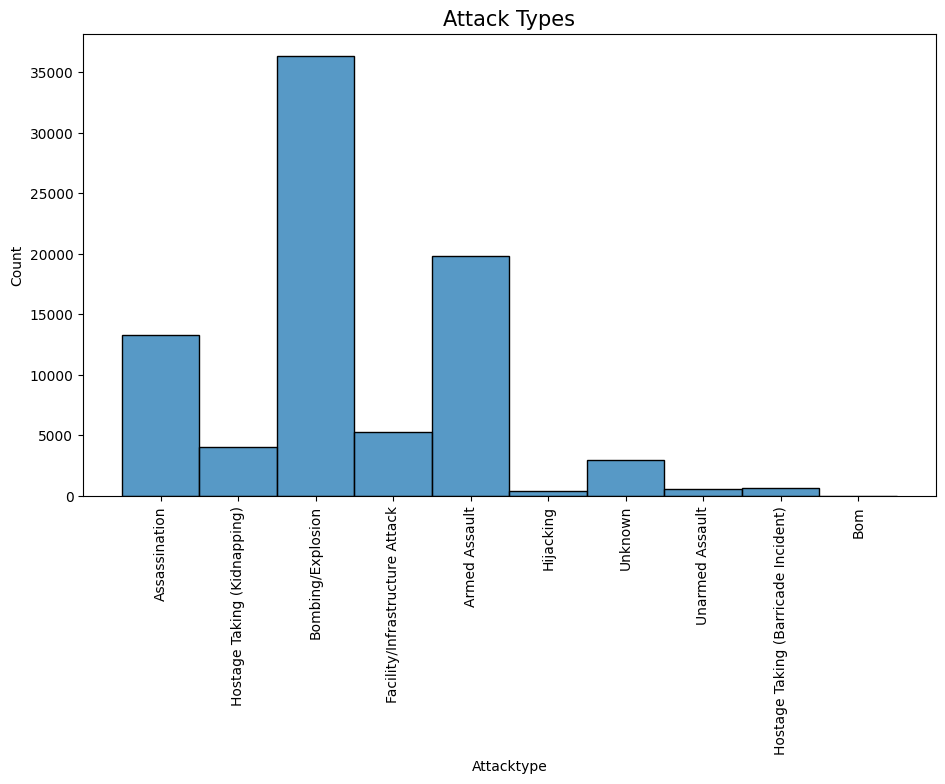

In [26]:
plt.figure(figsize = (11,6))
sns.histplot(df['Attacktype'], palette='vlag')
plt.title('Attack Types',fontsize=15)
plt.xticks(rotation=90)
plt.show()

* most of the Attack happened with Bombing/Explosion

* 10-20% of the Attack happened with Armed Assault and Assassination rest are in between 0-6%

## The Ten Countries Which Suffer Most From Terrorism

In [27]:
plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

## Most attacked countries

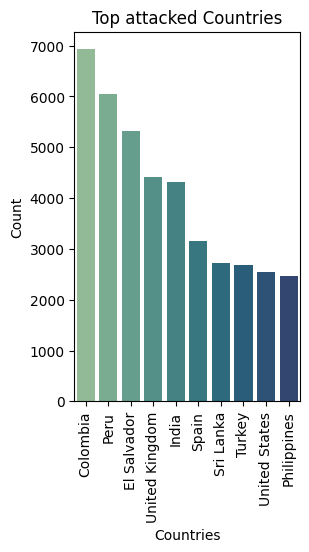

In [28]:
plt.subplot(1,2,1)
total = df.groupby(['Country'], as_index = False).count()
globe = px.choropleth(total, locations = 'Country', locationmode = 'country names', color = 'Year',
                       hover_name='Country', projection = 'orthographic', title = 'Number of Terrorist Attacks',
                       labels = {'Year':'Attacks'})
globe.show()


plt.subplot(1,2,1)
sns.barplot(x=df['Country'].value_counts()[:10].index,y=df['Country'].value_counts()[:10].values,palette='crest')
plt.title('Top attacked Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

* From the above graph Iraq is the most attacked country by terrorism, then comes Pakistan , Afganistan and india

## Most attacked targets

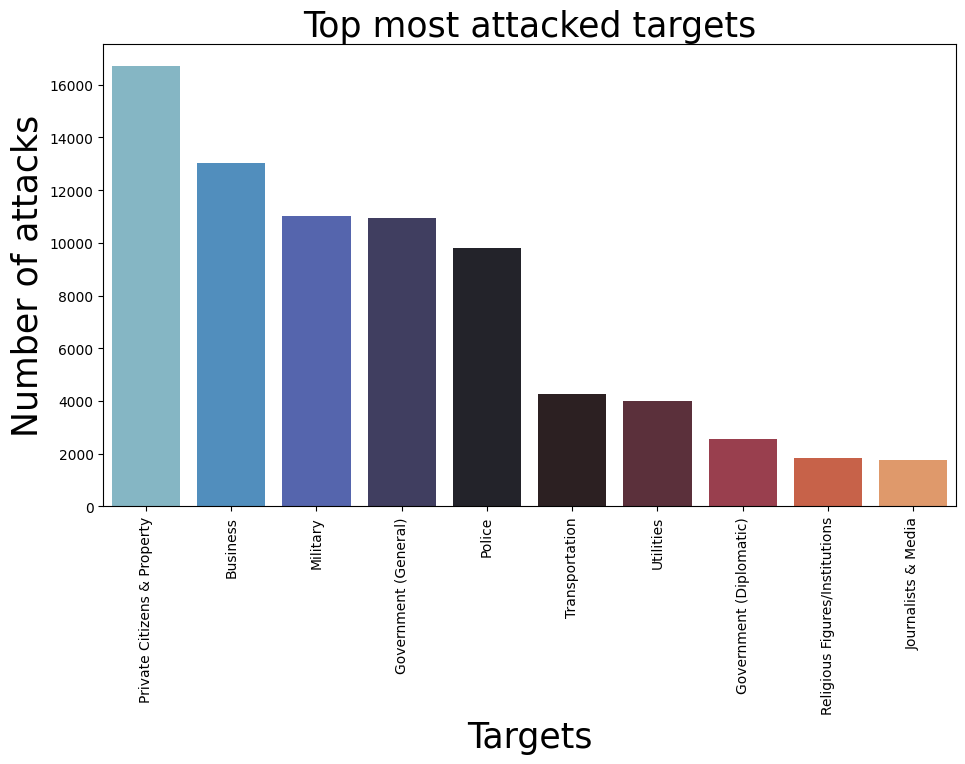

In [29]:
plt.figure(figsize = (11,6))
sns.barplot(x=df['Target_type'].value_counts().head(10).index,y=df['Target_type'].value_counts().head(10).values,
            palette='icefire')
plt.title('Top most attacked targets',fontsize=25)
plt.xlabel('Targets',fontsize=25)
plt.ylabel('Number of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

* From the above graph the most Attacked Target is 'Private Citizens & Property'

## Most Attacked Regions

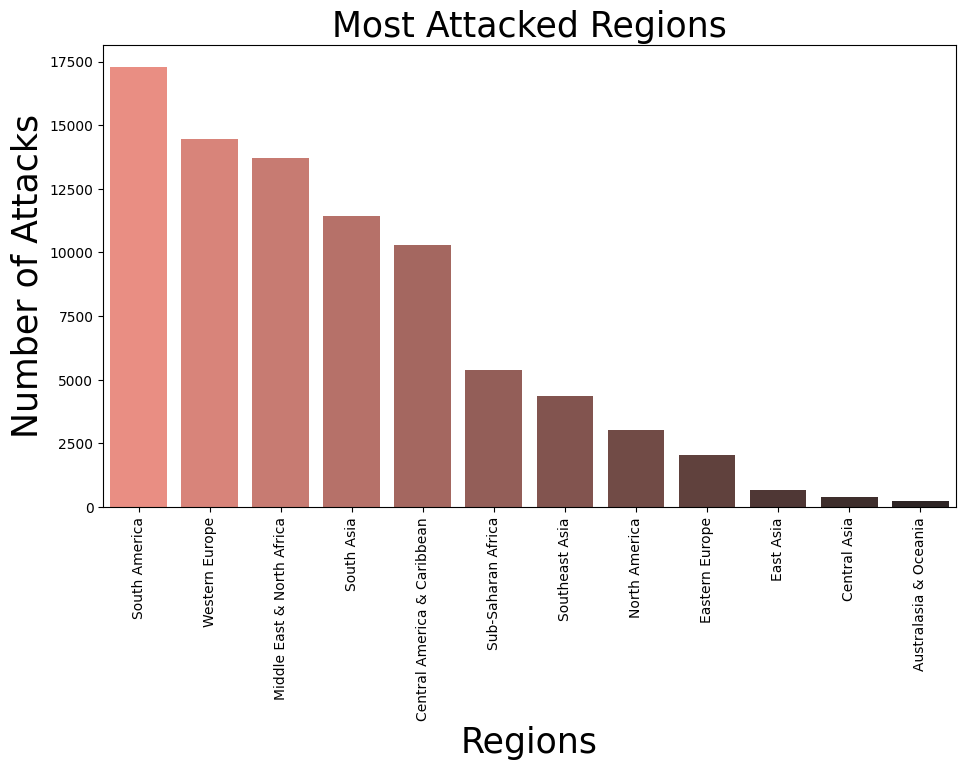

In [30]:
# regions with most attacks
plt.figure(figsize = (11,6))
sns.barplot(x=df['Region'].value_counts().index,y=df['Region'].value_counts().values,palette="dark:salmon_r")
plt.title('Most Attacked Regions',fontsize=25)
plt.xlabel('Regions',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

* from the above graph Most Attacked Region is 'Middle East and North Africa' then comes South Asia


## Most Attacked States

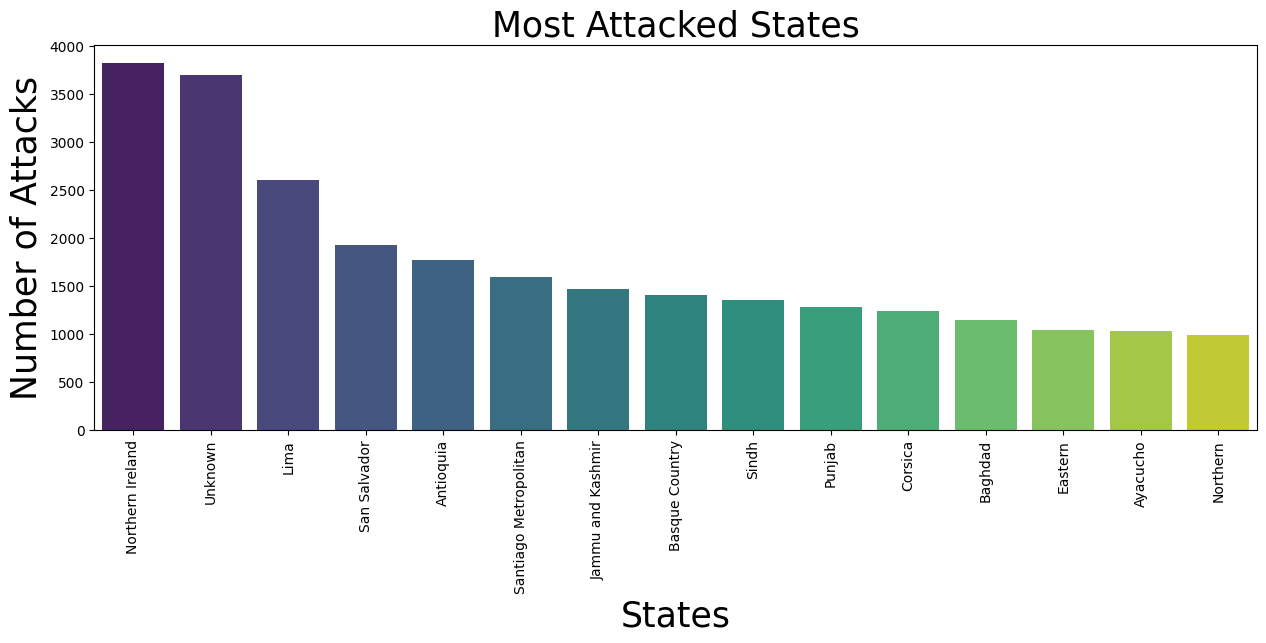

In [31]:
plt.figure(figsize = (11,6))
sns.barplot(x=df['State'].value_counts().head(15).index, y=df['State'].value_counts().head(15).values,palette='viridis')
plt.title('Most Attacked States',fontsize=25)
plt.xlabel('States',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)
plt.show()

* Most Attacked States is 'Baghdad'

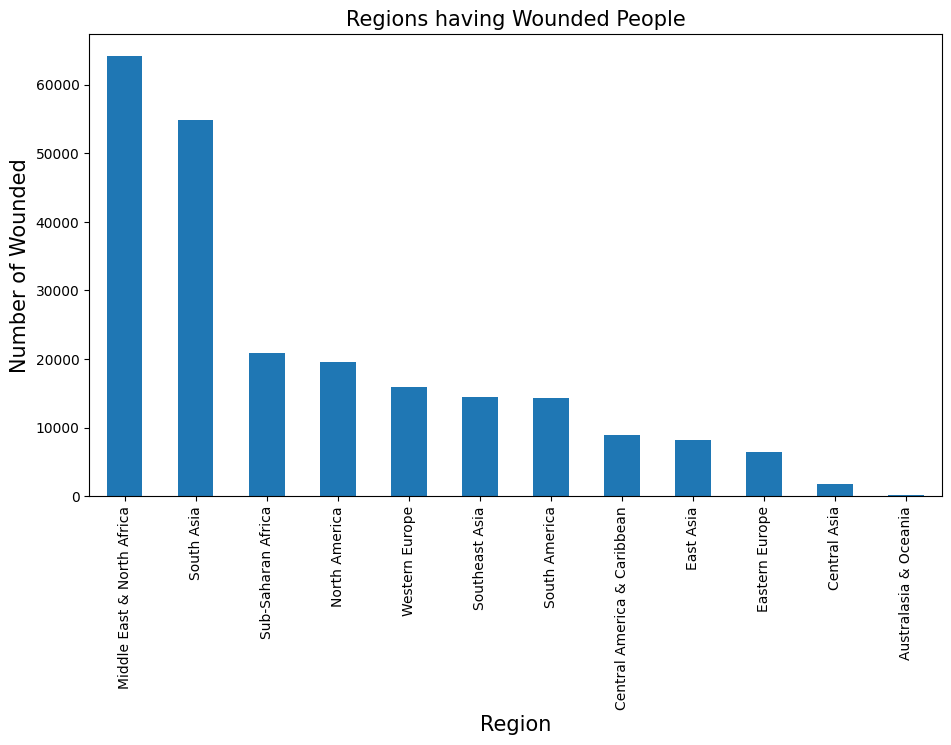

In [32]:
plt.figure(figsize = (11,6))
df.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## Top Terrorist Organization with Highest Terror Attacks

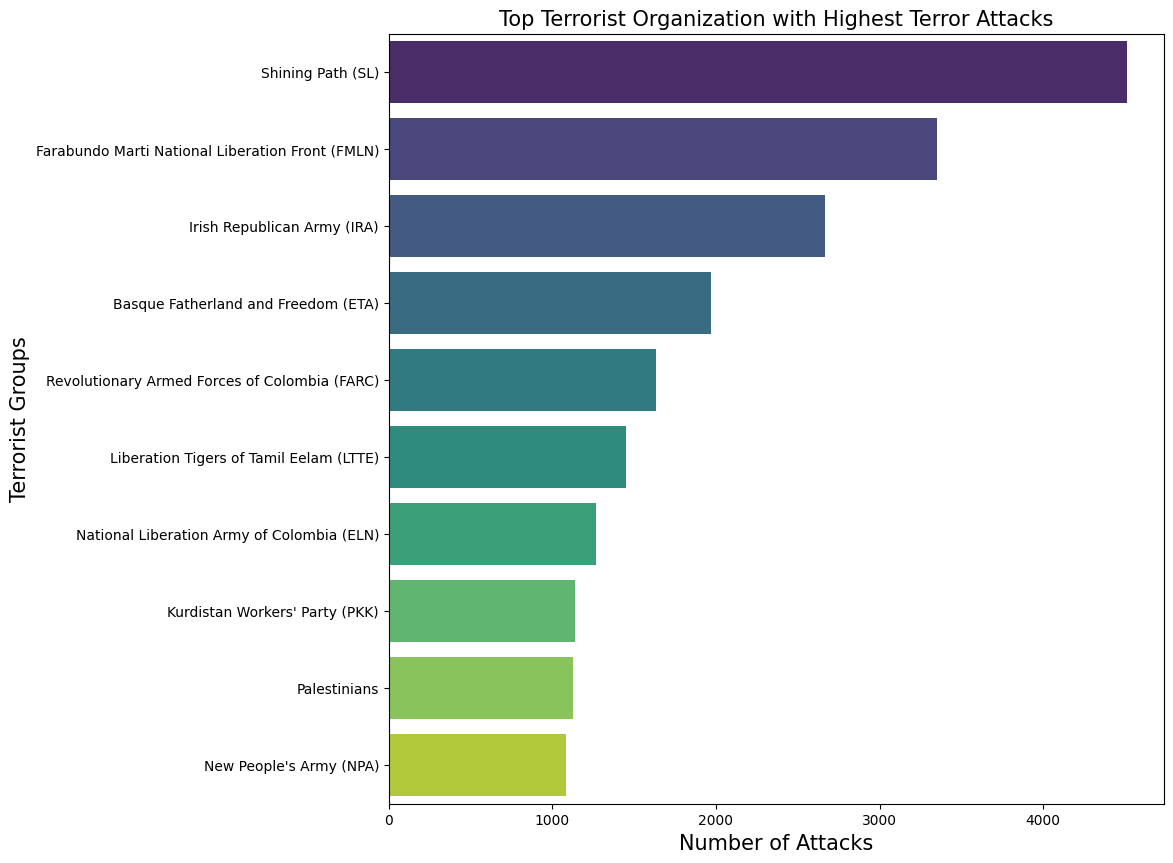

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Group'].value_counts()[1:11].values,y=df['Group'].value_counts()[1:11].index,palette='viridis')
plt.title('Top Terrorist Organization with Highest Terror Attacks',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()

## -->Taliban Terrorist Organization responsible for most insurgent attacks

In [34]:
df_tal = df[df.Group == 'Taliban']

In [35]:
df_tal.head()

,Year,Month,Day,Country,State,City,Latitude,Longitude,Region,Attacktype,Wounded,Group,Target_type,Target,Weapontype,Killed,casualties
59040,1995,4,20,Afghanistan,Unknown,Unknown,19.882372,-1088.695094,South Asia,Hostage Taking (Kidnapping),0,Taliban,Police,Federal Investigation Agency,Unknown,0,0
60014,1995,8,3,Afghanistan,Kandahar,Kandahar,31.631083,65.742226,South Asia,Hijacking,0,Taliban,Airports & Aircraft,Russian Il-76 Cargo Aircraft,Explosives,0,0
60462,1995,9,21,Afghanistan,Kandahar,Kandahar,31.631083,65.742226,South Asia,Hijacking,0,Taliban,Airports & Aircraft,Boeing 727,Explosives,0,0
60786,1995,10,25,Afghanistan,Kabul,Kabul,34.516895,69.147011,South Asia,Bombing/Explosion,0,Taliban,Airports & Aircraft,ICRC- Chartered Aircraft,Explosives,0,0
71682,2001,1,7,Afghanistan,Bamyan,Yakawlang,34.733333,66.966667,South Asia,Armed Assault,0,Taliban,Private Citizens & Property,Civilians living in the vicinity of Yakawlang,Firearms,150,150


# Terror Attacks by Taliban over the Years

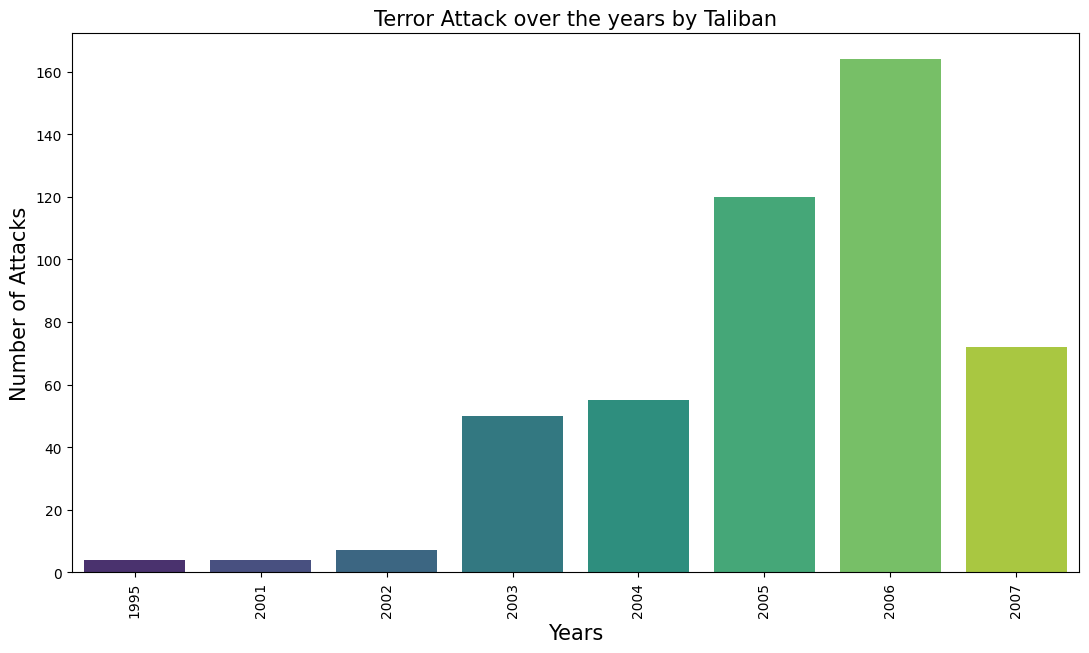

In [36]:
plt.figure(figsize = (13,7))
sns.barplot(x=df_tal['Year'].value_counts().index,y=df_tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

#### most of the attacked by Taliban in year 2015,2014,2016


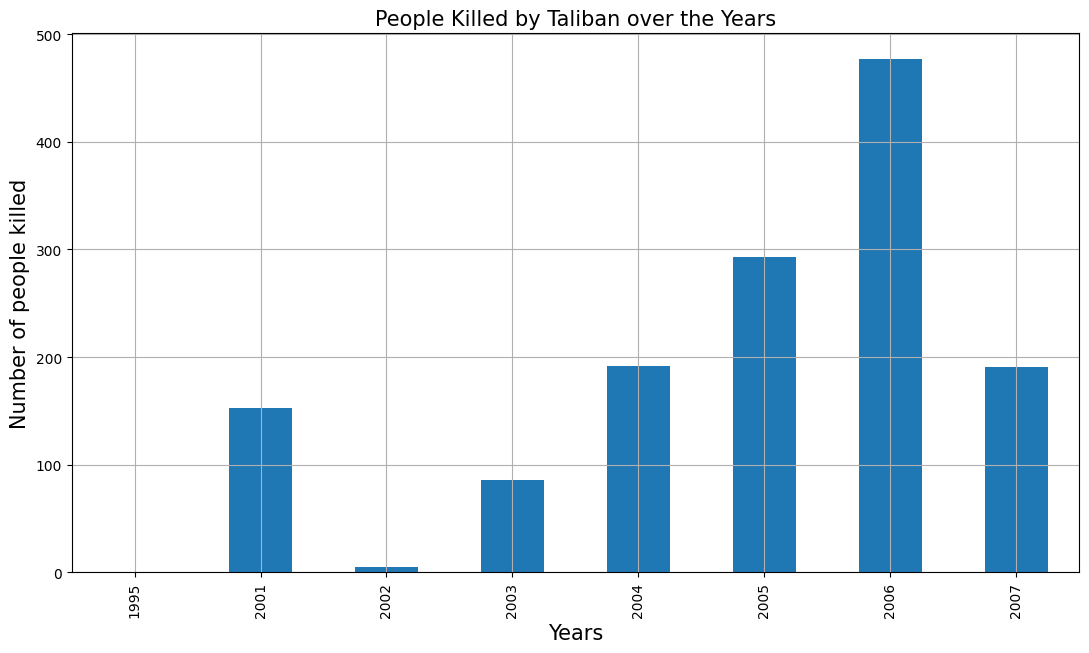

In [37]:
plt.figure(figsize=(13,7))
df_tal.groupby(['Year'])['Killed'].sum().plot(kind='bar')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

* Taliban killed more than 5000 people during 2015 after that little bit decreasing trend could be seen but still the numbers  are very high.



## Conclusion
### After performing the Exploratory Data Analysis we get the following insights from the data:

* Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
* Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.
* Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
* The State and City that was most affected was Baghdad
* In the last decade 2014 had most number of terror attacks.
* The most common attack type was Bombing/Explosion.
* Explosives have been consistently the most popular weapon of choice for terrorists.
* Taliban became more active since 2012 and they are responsible for the most of the terror attacks